# Task 5: Bifurcation in ANN

In [1]:
from sw.IntegratorNN import *
from sw.dataformating import get_train_and_val_data, get_sim_data
from sw.simulation import *
from sw.plotting import *

from torch.utils.data import DataLoader

## Hyperparameters:

In [6]:
LR = 1e-3 #learning rate
BATCHES = 128
EPOCHS = 5

INPUT_SIZE = 3
OUTPUT_SIZE = 2
DEPTH = 4

In [7]:
alphas = np.linspace(-5,5,25)
print(alphas)

train_percent = 80


t = 35
num = 10

[-5.         -4.58333333 -4.16666667 -3.75       -3.33333333 -2.91666667
 -2.5        -2.08333333 -1.66666667 -1.25       -0.83333333 -0.41666667
  0.          0.41666667  0.83333333  1.25        1.66666667  2.08333333
  2.5         2.91666667  3.33333333  3.75        4.16666667  4.58333333
  5.        ]


## Running the Euler template with the various alphas

/Users/magnus/Coding/MLCMS-TUM/MLCMS-C/final_project/sw/plotting.py:96: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12, 8))


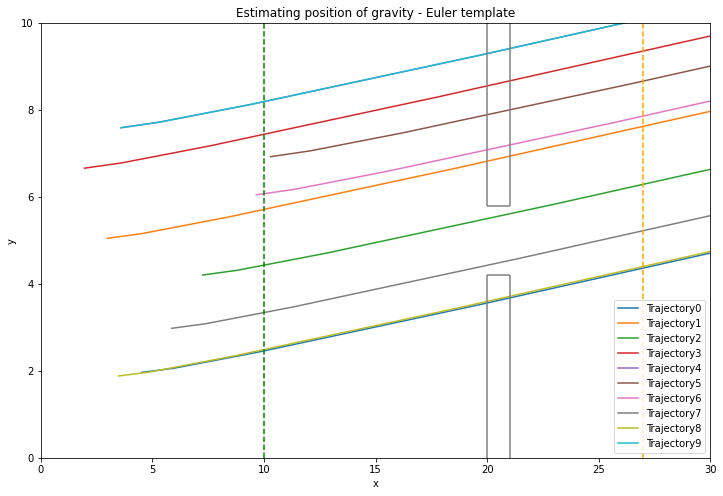

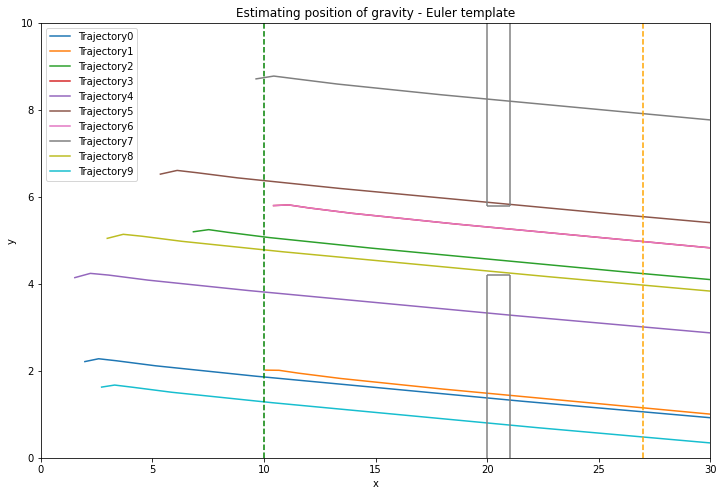

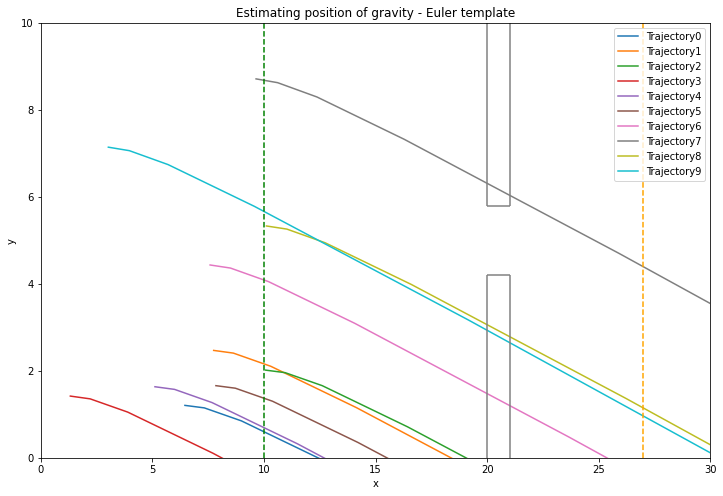

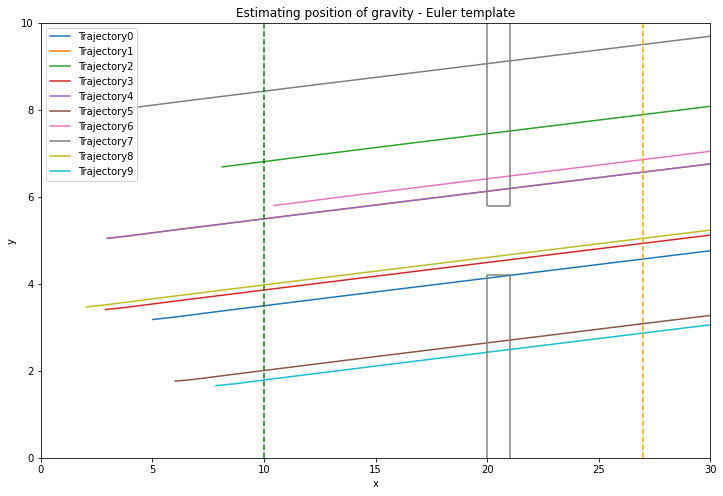

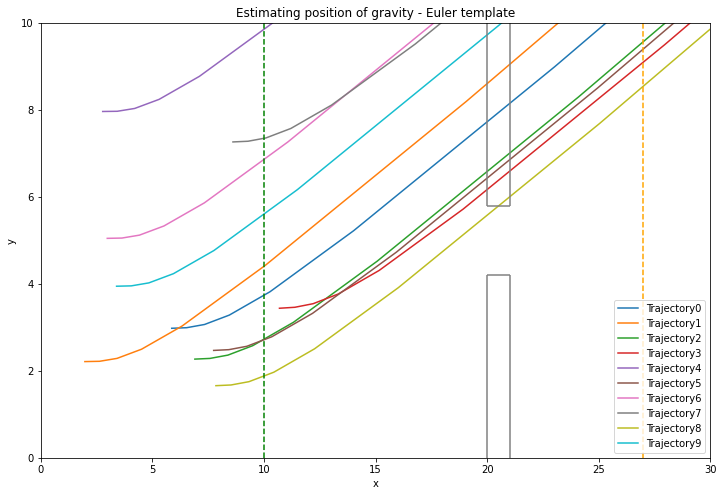

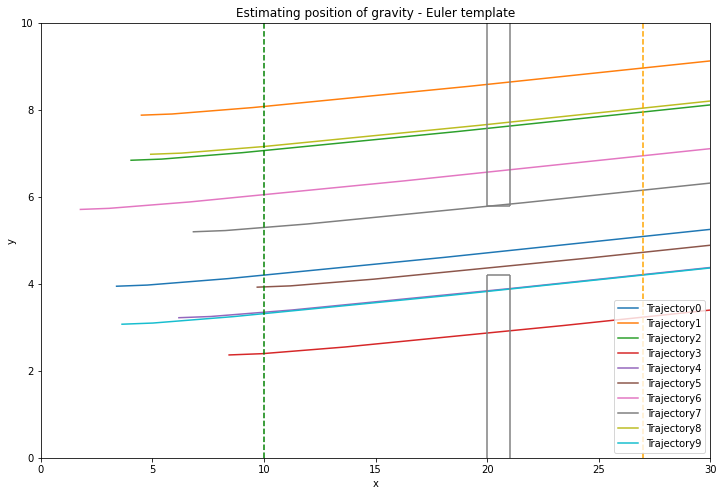

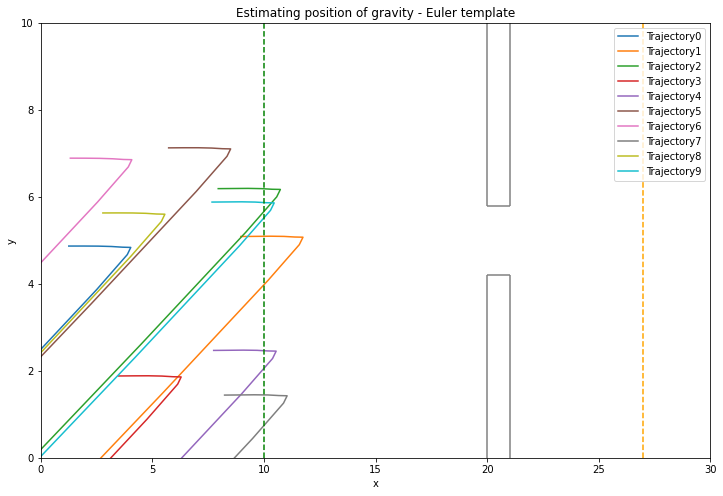

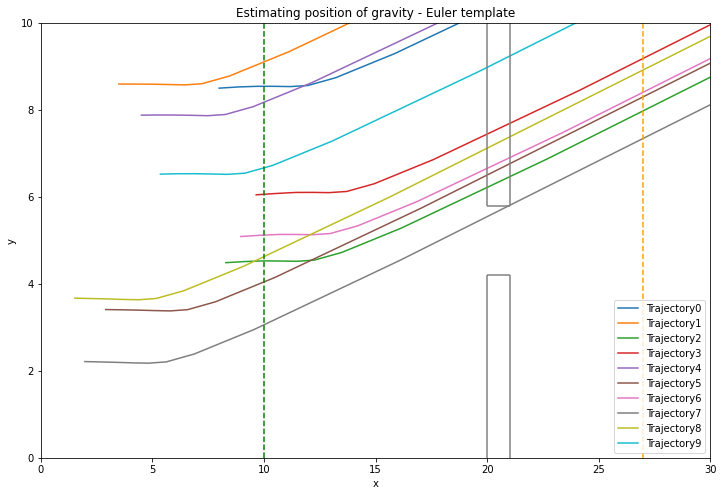

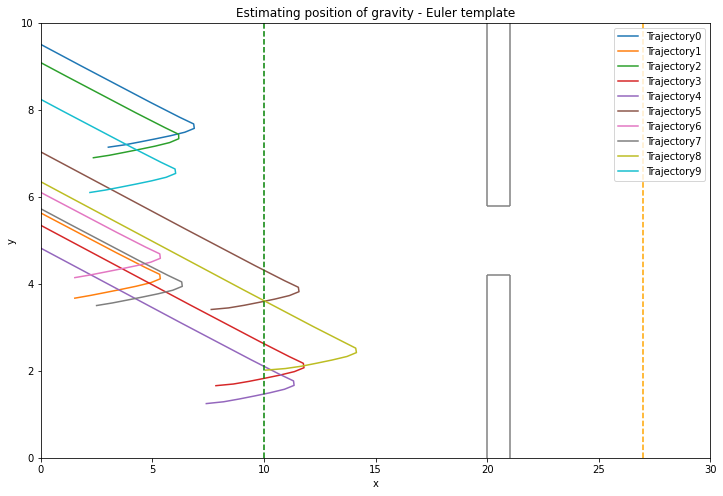

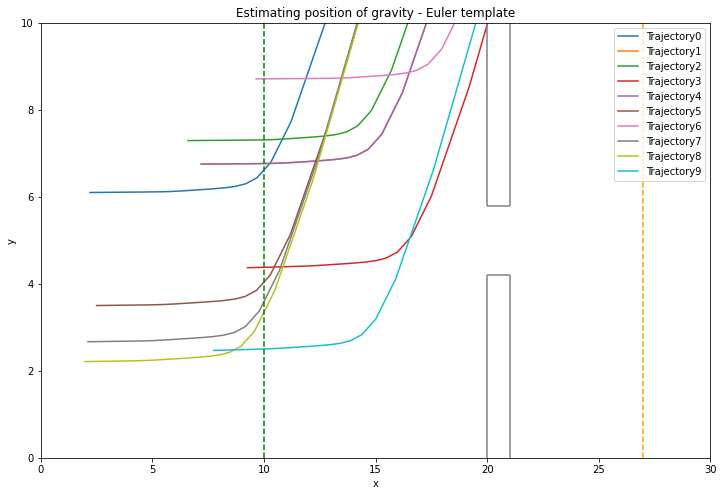

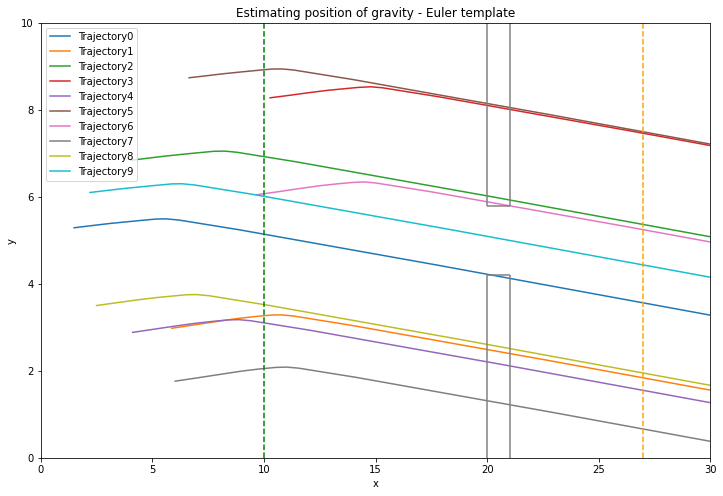

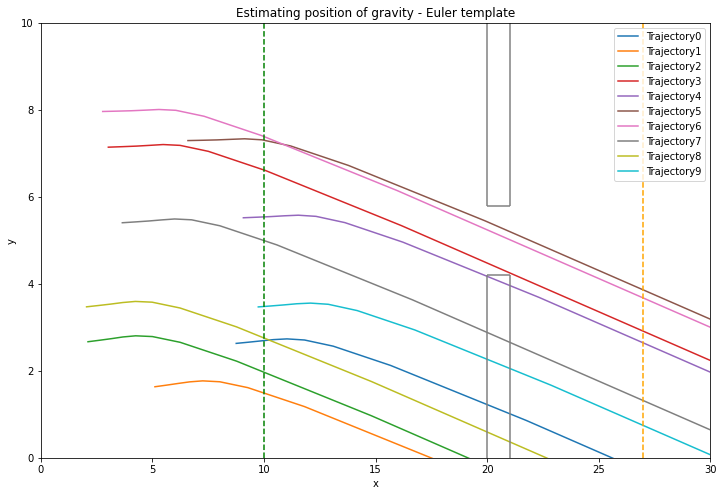

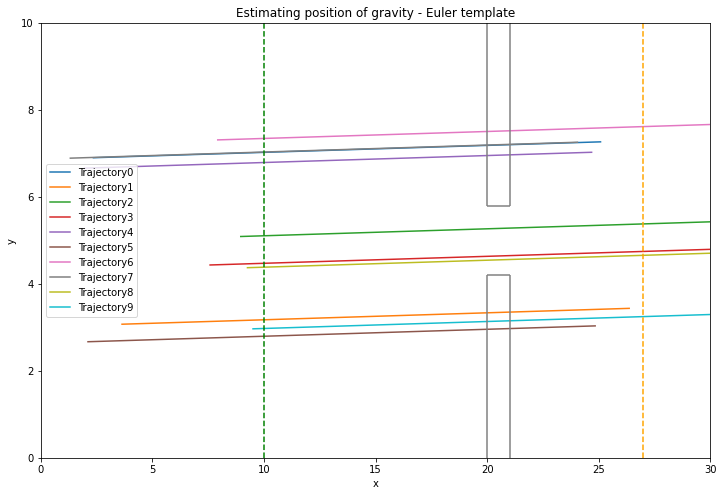

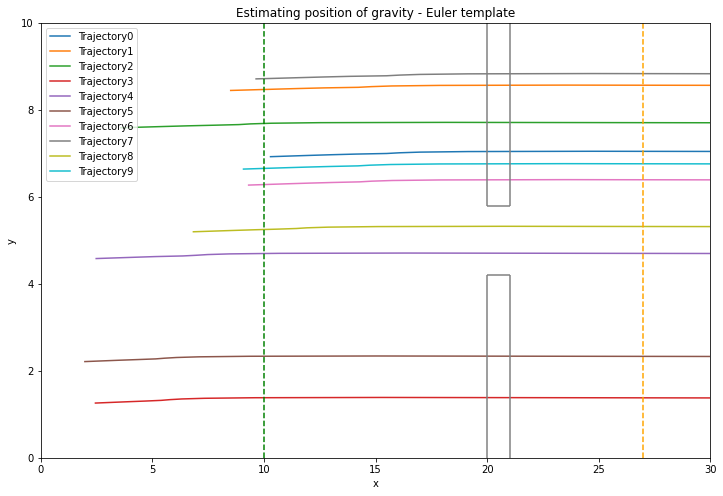

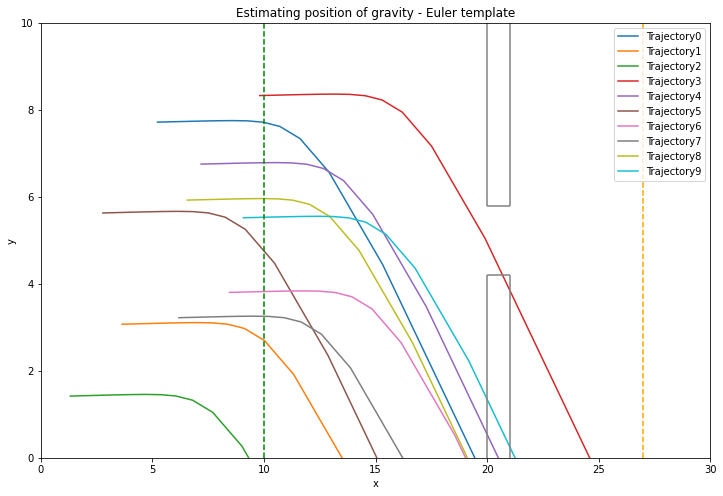

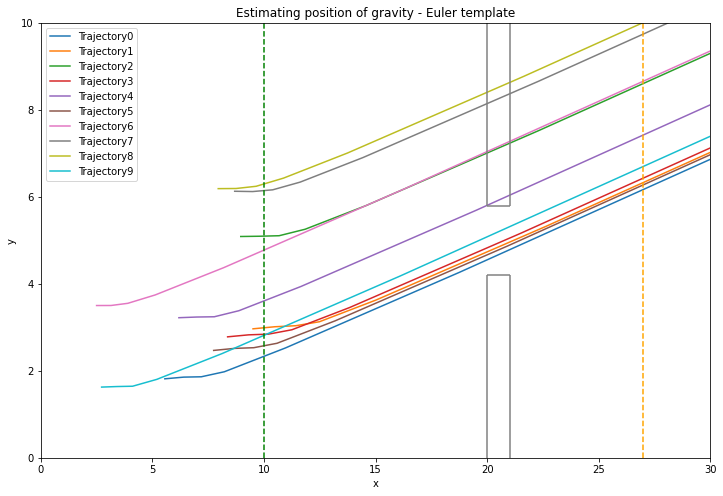

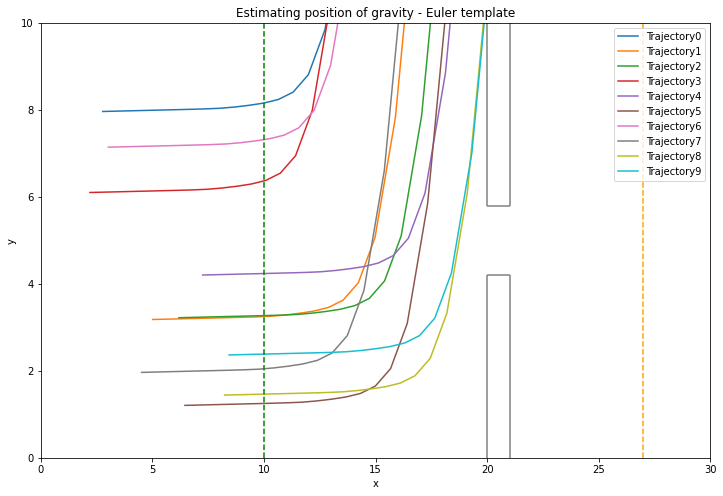

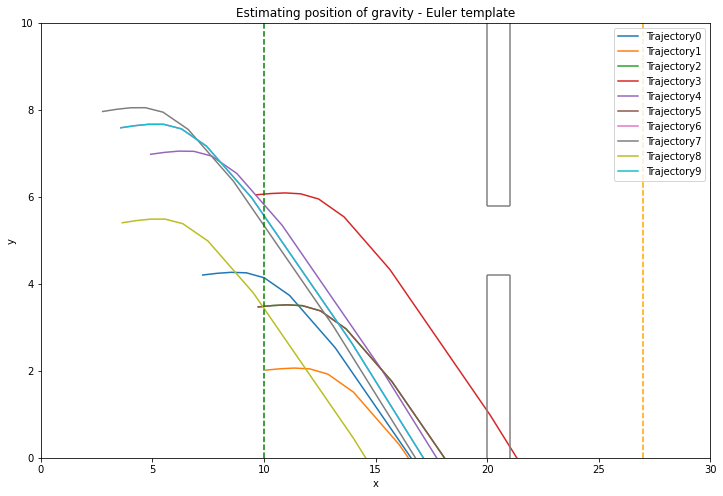

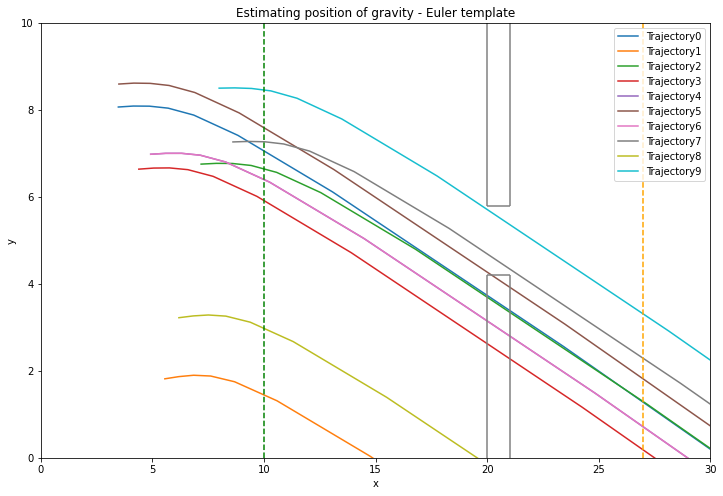

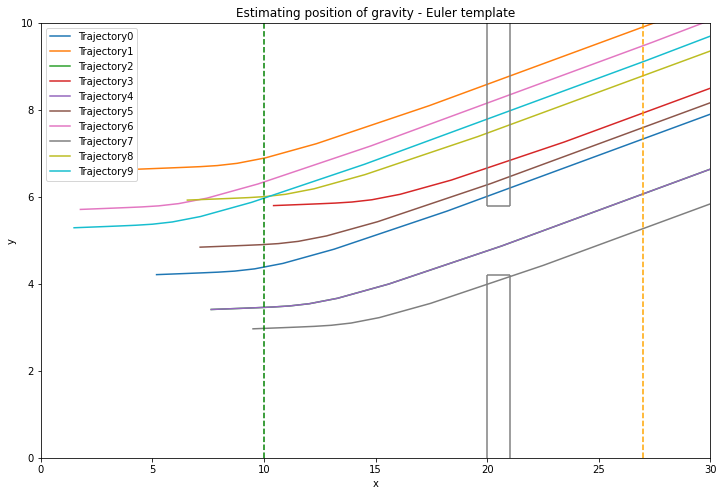

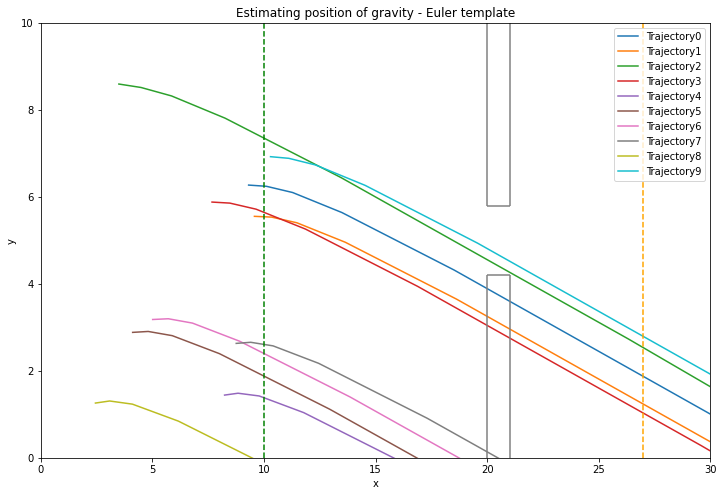

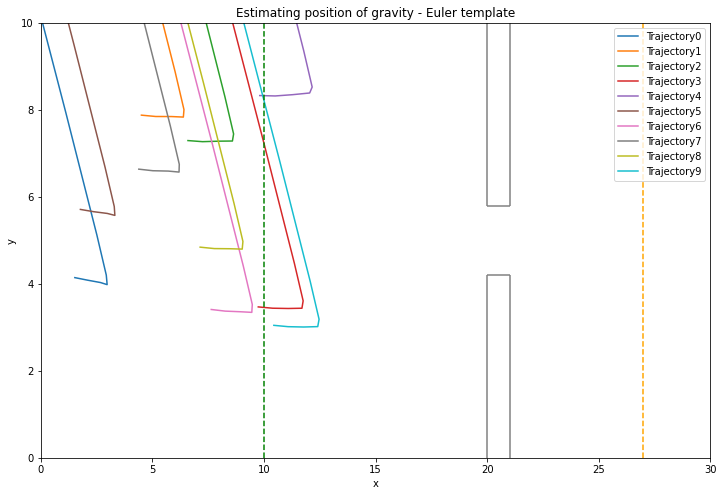

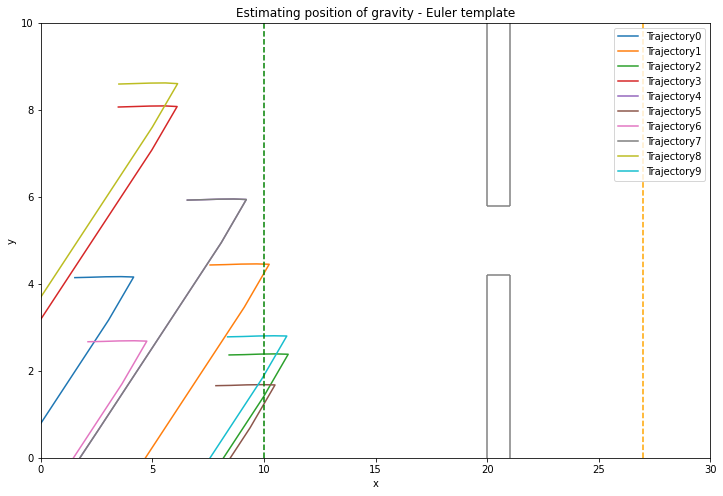

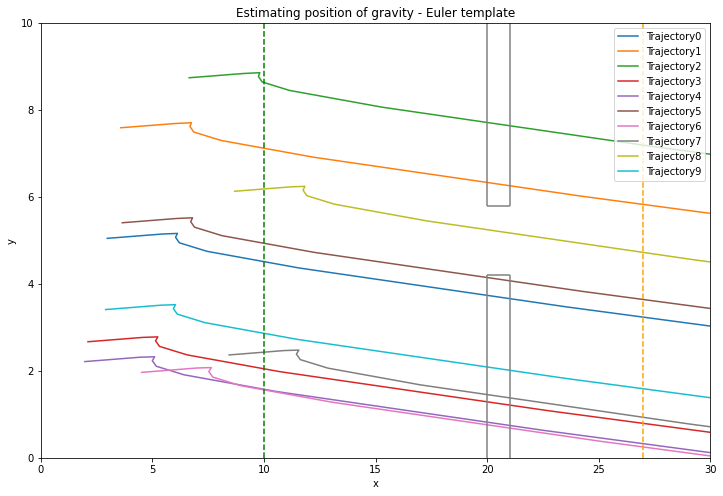

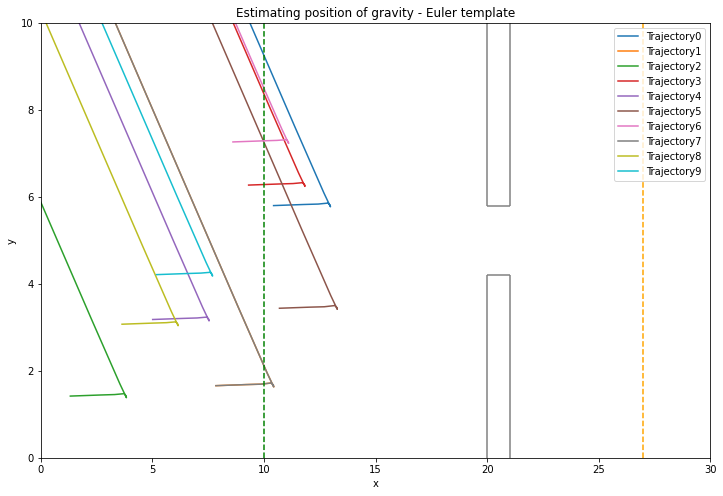

In [8]:
for alpha in alphas:
    train_data, val_data = get_train_and_val_data("datasets/postvis.csv",train_percent)
    train_set = DataLoader(train_data,batch_size=BATCHES,shuffle=True)
    val_set = DataLoader(val_data,shuffle=True)
    
    integratorNN = IntegratorNN(INPUT_SIZE,DEPTH,OUTPUT_SIZE)
    loss_data = integrator_bifurcation_training(integratorNN,LR,EPOCHS,train_set,alpha)
    val_loss, train_step = integrator_bifurcation_validating(integratorNN,LR,train_set,val_set,alpha)
    
    traj = simulate_bif_trajectories(num,t,integratorNN,"datasets/postvis.csv", alpha)
    plot_trajectories(num,traj)